<a href="https://colab.research.google.com/github/viniciusanl/Natural-Language-Analysis-And-Processing/blob/main/natural_language_analysis_and_processin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pra esse trabalho, será necessário utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

**Importar bibliotecas necessárias**

In [ ]:
import nltk, re, pprint, string, urllib.request

Download de todos os componentes necessários da biblioteca NLTK

In [ ]:
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

Criando as stopwords em português e inglês

In [37]:
english_stopwords = nltk.corpus.stopwords.words('english')
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

Criando a função de processamento de texto

In [38]:
def processing_text(str_text, _stopwords):
  for i in string.punctuation:
    str_text = str_text.lower().replace(i, '')

  text_format = str_text.replace('\n', ' ').replace('\x97', '').split(' ')
  #text_format = str_text.split(' ')

  no_stopwords = [words for words in text_format if words not in _stopwords]

  return(' '.join(no_stopwords))

Escolhendo os textos a serem utilizados na função de processamento

In [39]:
shakespeare_caesar = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt')
obra_machado = nltk.corpus.machado.raw('romance/marm05.txt')

sc_format = processing_text(shakespeare_caesar, english_stopwords)

om_format = processing_text(obra_machado, portuguese_stopwords)

tokens_shakespeare = nltk.tokenize.word_tokenize(sc_format)

tokens_machado = nltk.tokenize.word_tokenize(om_format)

prob_shakespeare = nltk.probability.FreqDist(tokens_shakespeare)
prob_machado = nltk.probability.FreqDist(tokens_machado)

Print das 10 palavras que mais se repetem nos textos

In [40]:
print(prob_shakespeare.most_common(10))
print(prob_machado.most_common(10))

[('caesar', 190), ('brutus', 161), ('bru', 153), ('haue', 147), ('shall', 125), ('thou', 115), ('cassi', 107), ('cassius', 85), ('antony', 75), ('come', 74)]
[('capítulo', 209), ('virgília', 202), ('coisa', 147), ('olhos', 138), ('disse', 130), ('nada', 126), ('outro', 124), ('vida', 118), ('outra', 116), ('tempo', 114)]


Palavra que mais se repete

In [41]:
print('Palavra que mais se repete no texto de Shakespeare Caesar: ' + prob_shakespeare.max())
print('Palavra que mais se repete no texto do Machado de Assis - Memórias Póstumas de Brás Cubas (1881): ' + prob_machado.max())

Palavra que mais se repete no texto de Shakespeare Caesar: caesar
Palavra que mais se repete no texto do Machado de Assis - Memórias Póstumas de Brás Cubas (1881): capítulo


Plot de 20 palavras que mais se repete nas obras

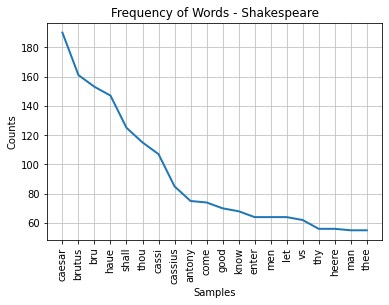

In [42]:
prob_shakespeare.plot(20, title='Frequency of Words - Shakespeare')

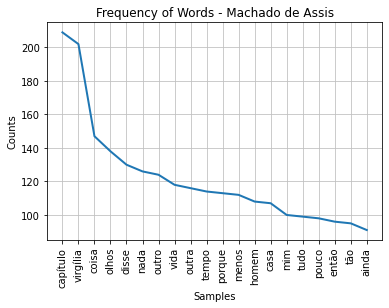

In [43]:
prob_machado.plot(20, title='Frequency of Words - Machado de Assis')

In [44]:
analytics_shakespeare = nltk.Text(tokens_shakespeare)
analytics_machado = nltk.Text(tokens_machado)

Similaridade de palavras

In [45]:
analytics_machado.similar('capítulo')

acaso


In [46]:
analytics_shakespeare.similar('caesar')

enter know would antony heere bid loue bru please mark affraid liuing
octauius rose


Bigramas de texto

In [47]:
analytics_machado.collocations()

quincas borba; lobo neves; brás cubas; alguma coisa; dia seguinte;
outra vez; alguns instantes; cinco contos; rio janeiro; outra coisa;
mesma coisa; muitas vezes; coisa nenhuma; nesta página; meia dobra;
idéia fixa; alma sensível; ponta nariz; tio joão; arma virumque


In [48]:
analytics_shakespeare.collocations()

mark antony; marke antony; ides march; thou art; thou hast; good
morrow; caius ligarius; metellus cymber; art thou; exeunt manet; mine
owne; varrus claudio; fell downe; lord bru; good night; haue seene;
enter lucius; beware ides; would haue; shall finde


In [26]:
text_web = urllib.request.urlopen("https://www.gutenberg.org/files/45438/45438-8.txt").read()

book_la_isla_del_tesoro = processing_text(str(text_web, 'latin1'), spanish_stopwords)

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
